In [15]:
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
 

In [9]:
conn=sqlite3.connect("../data/articles.db")
df=pd.read_sql("SELECT * FROM articles", conn)

conn.close()

print(df.head())
print(df.isnull().sum())

   id                                              title content summary  \
0   1  Why Crypto Adoption Stalled – And What Can Res...            None   
1   2                                      TELUS Digital            None   
2   3  DOGE, XRP, ETH, SOL Follow Bitcoin Through the...            None   
3   4  What’s Next for Bitcoin With Crypto Market Che...            None   
4   5  Bettors Lose Millions Predicting the New Pope ...            None   

                                                 url        date  
0  https://www.coindesk.com/sponsored-content/why...  2025-05-09  
1   https://www.telusdigital.com/crypto-cx-solutions  2025-05-09  
2  https://www.coindesk.com/markets/2025/05/09/fr...  2025-05-09  
3  https://www.coindesk.com/markets/2025/05/08/wh...  2025-05-09  
4  https://www.coindesk.com/markets/2025/05/09/be...  2025-05-09  
id           0
title        0
content      0
summary    415
url          0
date        16
dtype: int64


In [11]:
df.replace(['', ' ', 'NaN', 'nan'], pd.NA, inplace=True)
df.isnull().sum()

id           0
title        0
content    157
summary    415
url          0
date        16
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       415 non-null    int64 
 1   title    415 non-null    object
 2   content  258 non-null    object
 3   summary  0 non-null      object
 4   url      415 non-null    object
 5   date     399 non-null    object
dtypes: int64(1), object(5)
memory usage: 19.6+ KB


In [13]:
df=df.drop_duplicates(subset='title').reset_index(drop=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       227 non-null    int64 
 1   title    227 non-null    object
 2   content  183 non-null    object
 3   summary  0 non-null      object
 4   url      227 non-null    object
 5   date     211 non-null    object
dtypes: int64(1), object(5)
memory usage: 10.8+ KB


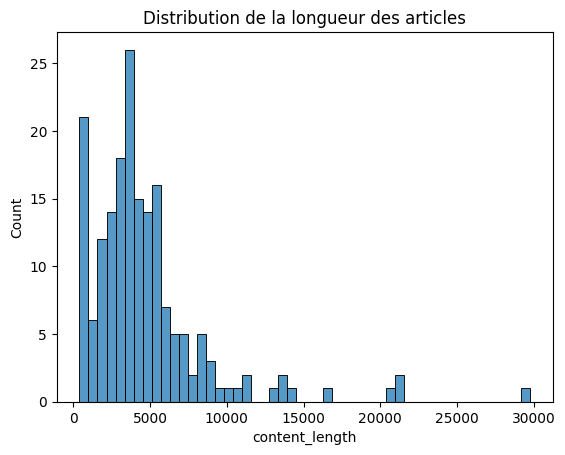

In [17]:
df['content_length']=df['content'].str.len()
sns.histplot(df['content_length'],bins=50)

plt.title('Distribution de la longueur des articles')
plt.show()
